In [1]:
import rdkit
import rdkit.Chem as Chem

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [5]:
data = pd.read_csv("jak2_data.csv") #reference library

In [6]:
data

,SMILES,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59
...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97


In [9]:
reference = data.sort_values(by=['pIC50'], ascending=False)
reference

,SMILES,pIC50
1910,COC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72
...,...,...
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34


In [13]:
reference_high = reference[reference['pIC50'] > 10]

In [11]:
reference_high['Order'] = reference_high['pIC50'].astype(str)
reference_high

C:\Users\wanjoochun\anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SMILES,pIC50,Order
1910,COC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97,10.97
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97,10.97
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78,10.78
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76,10.76
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72,10.72
1905,CC(C)CS(=O)(=O)N1CCCC(Nc2nc(N)ncc2-c2cnc3[nH]c...,10.71,10.71
1904,CS(=O)(=O)N1CCC(O)C(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.70,10.7
1903,CC1CC(C[SH](=O)(O)N2CCC(CO)C2)CCC1N(C)c1[nH]cn...,10.70,10.7
1902,CS(=O)(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.68,10.68
1901,CS(=O)(=O)N1CCCC(Nc2nc(N3CCC(CC(N)=O)CC3)ncc2-...,10.66,10.66


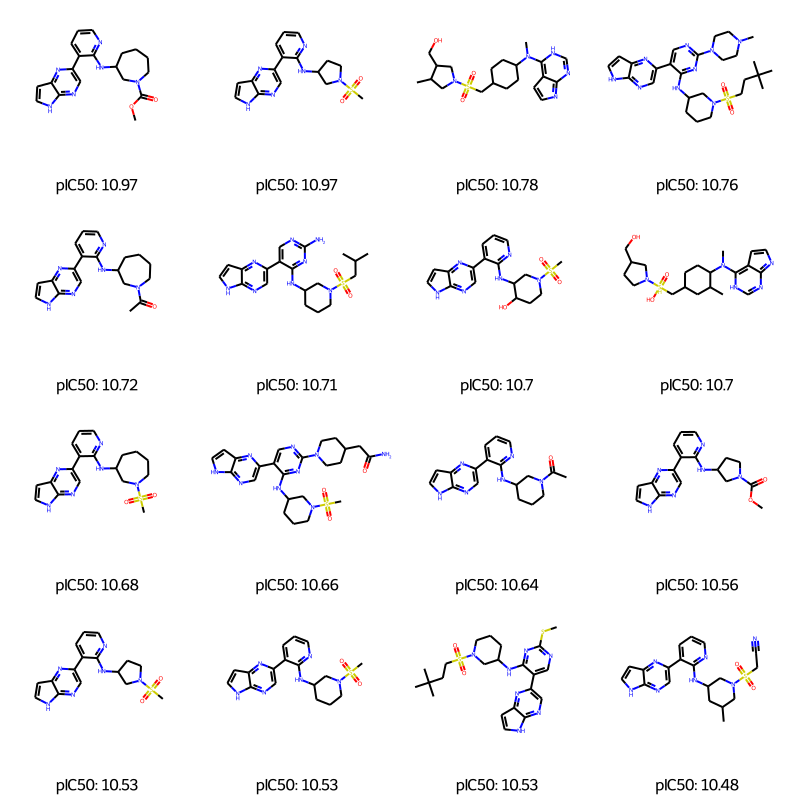

In [12]:
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
ms = [Chem.MolFromSmiles(smi) for smi in reference_high['SMILES'][:16]]

img=Draw.MolsToGridImage(ms,molsPerRow=4,subImgSize=(200,200),legends=list("pIC50: " + reference_high['Order']), returnPNG=False)
#img.save("refence_pIC50.jpg")
img

In [23]:
colnames = ['SMILES', 'CHEMBL_ID']   #1.5 million small molecule library
chembl = pd.read_csv("chembl_22_clean_1576904_sorted_std_final.smi", sep='\t', names=colnames, header=None)

In [24]:
chembl_df = pd.DataFrame(chembl)

In [25]:
chembl_df

,SMILES,CHEMBL_ID
0,CCO,CHEMBL545
1,C,CHEMBL17564
2,CO,CHEMBL14688
3,NCCS,CHEMBL602
4,NCCN,CHEMBL816
...,...,...
1576899,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,CHEMBL1077161
1576900,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,CHEMBL1077162
1576901,n1(cnc2c1N=C(N)NC2=O)C1OC(COP(O)(=O)OC2C(COP(O...,CHEMBL1077165
1576902,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,CHEMBL1077164


## Molecular descriptors
* In this example, we will use the following descriptors. 
1. Molecular Weight
2. Number of hydrogen bond acceptors. 
3. Number of hydrogen bond donors. 
4. logP
5. fraction of SP3 hybridized carbon
6. Number of rotatable bond. 
7. Number of rings. 
8. TPSA: polar surface area.
9. Number of Aramatic Rings

In [84]:
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcCrippenDescriptors, CalcNumLipinskiHBA, CalcNumLipinskiHBD, CalcFractionCSP3, CalcNumRotatableBonds, CalcNumRings, CalcTPSA, CalcNumAromaticRings

# empty dictionary for pandas
properties = {"MW":[], "LogP":[], "HBA":[], "HBD": [], 
              "CSP3": [], "NumRotBond": [], "NumRings": [], "TPSA": [], 
              "NumAromaticRings": [], "pIC50": []}

for idx, smiles in enumerate(data["SMILES"]):
    mol = Chem.MolFromSmiles(smiles)
    properties["MW"].append(CalcExactMolWt(mol))
    properties["LogP"].append(CalcCrippenDescriptors(mol)[0])
    properties["HBA"].append(CalcNumLipinskiHBA(mol))
    properties["HBD"].append(CalcNumLipinskiHBD(mol))
    properties["CSP3"].append(CalcFractionCSP3(mol))
    properties["NumRotBond"].append(CalcNumRotatableBonds(mol))
    properties["NumRings"].append(CalcNumRings(mol))
    properties["TPSA"].append(CalcTPSA(mol))
    properties["NumAromaticRings"].append(CalcNumAromaticRings(mol))
    properties["pIC50"].append(data["pIC50"].iloc[idx])

In [85]:
new_data = pd.DataFrame(properties)

In [86]:
new_data

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,pIC50
0,367.044919,4.1591,5,1,0.000000,4,4,71.95,4,4.26
1,506.126768,3.6743,10,4,0.083333,7,5,149.78,5,4.34
2,317.173942,1.5361,6,4,0.529412,5,3,101.37,2,4.53
3,301.190260,0.9510,6,5,0.500000,5,3,98.96,2,4.56
4,294.093917,3.2130,4,2,0.062500,2,3,49.84,3,4.59
...,...,...,...,...,...,...,...,...,...,...
1906,350.185509,2.8328,7,2,0.368421,3,4,86.80,3,10.72
1907,541.294742,2.8090,11,2,0.615385,7,5,123.24,3,10.76
1908,421.214761,1.7945,8,2,0.700000,6,4,102.42,0,10.78
1909,358.121195,1.4657,8,2,0.312500,4,4,103.87,3,10.97


In [27]:
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcCrippenDescriptors, CalcNumLipinskiHBA, CalcNumLipinskiHBD, CalcFractionCSP3, CalcNumRotatableBonds, CalcNumRings, CalcTPSA, CalcNumAromaticRings

# empty dictionary for pandas
properties6 = {"MW":[], "LogP":[], "HBA":[], "HBD": [], 
              "CSP3": [], "NumRotBond": [], "NumRings": [], "TPSA": [], 
              "NumAromaticRings": [], "CHEMBL_ID":[],"SMILES":[]}

for idx, SMILES in enumerate(chembl_df['SMILES']):
    mol = Chem.MolFromSmiles(SMILES)
    if mol == None:
        continue
    properties6["MW"].append(CalcExactMolWt(mol))
    properties6["LogP"].append(CalcCrippenDescriptors(mol)[0])
    properties6["HBA"].append(CalcNumLipinskiHBA(mol))
    properties6["HBD"].append(CalcNumLipinskiHBD(mol))
    properties6["CSP3"].append(CalcFractionCSP3(mol))
    properties6["NumRotBond"].append(CalcNumRotatableBonds(mol))
    properties6["NumRings"].append(CalcNumRings(mol))
    properties6["TPSA"].append(CalcTPSA(mol))
    properties6["NumAromaticRings"].append(CalcNumAromaticRings(mol))
    properties6["CHEMBL_ID"].append(chembl_df["CHEMBL_ID"][idx])
    properties6["SMILES"].append(SMILES)
  

In [28]:
chembl_data = pd.DataFrame(properties6)

In [29]:
chembl_data

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,CHEMBL_ID,SMILES
0,46.041865,-0.00140,1,1,1.000000,0,0,20.23,0,CHEMBL545,CCO
1,16.031300,0.63610,0,0,1.000000,0,0,0.00,0,CHEMBL17564,C
2,32.026215,-0.39150,1,1,1.000000,0,0,20.23,0,CHEMBL14688,CO
3,77.029920,-0.12510,1,2,1.000000,1,0,26.02,0,CHEMBL602,NCCS
4,60.068748,-1.09620,2,4,1.000000,1,0,52.04,0,CHEMBL816,NCCN
...,...,...,...,...,...,...,...,...,...,...,...
1575722,9745.484445,-28.69698,316,117,0.498371,172,81,4497.11,49,CHEMBL1077161,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...
1575723,9745.484445,-28.69698,316,117,0.498371,172,81,4497.11,49,CHEMBL1077162,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...
1575724,10183.567262,-27.95436,327,119,0.495385,179,85,4635.42,51,CHEMBL1077165,n1(cnc2c1N=C(N)NC2=O)C1OC(COP(O)(=O)OC2C(COP(O...
1575725,10092.536296,-30.16516,327,120,0.503145,178,84,4638.22,50,CHEMBL1077164,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...


In [35]:
chembl_data_t = chembl_data.iloc[:, :-2]
chembl_data_t

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings
0,46.041865,-0.00140,1,1,1.000000,0,0,20.23,0
1,16.031300,0.63610,0,0,1.000000,0,0,0.00,0
2,32.026215,-0.39150,1,1,1.000000,0,0,20.23,0
3,77.029920,-0.12510,1,2,1.000000,1,0,26.02,0
4,60.068748,-1.09620,2,4,1.000000,1,0,52.04,0
...,...,...,...,...,...,...,...,...,...
1575722,9745.484445,-28.69698,316,117,0.498371,172,81,4497.11,49
1575723,9745.484445,-28.69698,316,117,0.498371,172,81,4497.11,49
1575724,10183.567262,-27.95436,327,119,0.495385,179,85,4635.42,51
1575725,10092.536296,-30.16516,327,120,0.503145,178,84,4638.22,50


In [36]:
y = new_data.iloc[:, -1]

## Separation of Feature and Target

In [37]:
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1] 

# Separation of training set and test set

In [38]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest Regressor!

In [39]:
import sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [40]:
my_model = RandomForestRegressor()

In [41]:
my_model.fit(X_train, y_train)

RandomForestRegressor()

## Evaluation

In [42]:
y_pred = my_model.predict(X_test)

In [44]:
chembl_data_t = chembl_data.iloc[:, :-2]
chembl_data_t

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings
0,46.041865,-0.00140,1,1,1.000000,0,0,20.23,0
1,16.031300,0.63610,0,0,1.000000,0,0,0.00,0
2,32.026215,-0.39150,1,1,1.000000,0,0,20.23,0
3,77.029920,-0.12510,1,2,1.000000,1,0,26.02,0
4,60.068748,-1.09620,2,4,1.000000,1,0,52.04,0
...,...,...,...,...,...,...,...,...,...
1575722,9745.484445,-28.69698,316,117,0.498371,172,81,4497.11,49
1575723,9745.484445,-28.69698,316,117,0.498371,172,81,4497.11,49
1575724,10183.567262,-27.95436,327,119,0.495385,179,85,4635.42,51
1575725,10092.536296,-30.16516,327,120,0.503145,178,84,4638.22,50


In [45]:
y_pred_chembl = my_model.predict(chembl_data_t)
y_pred_chembl

array([6.7753, 6.7787, 6.7753, ..., 8.0796, 8.0796, 8.1264])

In [46]:
colname = ['pIC50']
pic50_df = pd.DataFrame(y_pred_chembl, columns=colname)

In [49]:
chembl_data.head()

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,CHEMBL_ID,SMILES
0,46.041865,-0.0014,1,1,1.0,0,0,20.23,0,CHEMBL545,CCO
1,16.031300,0.6361,0,0,1.0,0,0,0.00,0,CHEMBL17564,C
2,32.026215,-0.3915,1,1,1.0,0,0,20.23,0,CHEMBL14688,CO
3,77.029920,-0.1251,1,2,1.0,1,0,26.02,0,CHEMBL602,NCCS
4,60.068748,-1.0962,2,4,1.0,1,0,52.04,0,CHEMBL816,NCCN


In [50]:
total_chembl = pd.concat([chembl_data, pic50_df], axis=1)

In [51]:
total_chembl

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,CHEMBL_ID,SMILES,pIC50
0,46.041865,-0.00140,1,1,1.000000,0,0,20.23,0,CHEMBL545,CCO,6.77530
1,16.031300,0.63610,0,0,1.000000,0,0,0.00,0,CHEMBL17564,C,6.77870
2,32.026215,-0.39150,1,1,1.000000,0,0,20.23,0,CHEMBL14688,CO,6.77530
3,77.029920,-0.12510,1,2,1.000000,1,0,26.02,0,CHEMBL602,NCCS,6.66420
4,60.068748,-1.09620,2,4,1.000000,1,0,52.04,0,CHEMBL816,NCCN,6.60445
...,...,...,...,...,...,...,...,...,...,...,...,...
1575722,9745.484445,-28.69698,316,117,0.498371,172,81,4497.11,49,CHEMBL1077161,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,8.07960
1575723,9745.484445,-28.69698,316,117,0.498371,172,81,4497.11,49,CHEMBL1077162,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,8.07960
1575724,10183.567262,-27.95436,327,119,0.495385,179,85,4635.42,51,CHEMBL1077165,n1(cnc2c1N=C(N)NC2=O)C1OC(COP(O)(=O)OC2C(COP(O...,8.07960
1575725,10092.536296,-30.16516,327,120,0.503145,178,84,4638.22,50,CHEMBL1077164,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,8.07960


In [52]:
total_chembl_sort = total_chembl.sort_values(by=['pIC50'], ascending=False)

In [53]:
total_chembl_sort

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,CHEMBL_ID,SMILES,pIC50
789497,358.121195,1.46570,8,2,0.312500,4,4,103.87,3,CHEMBL3665128,CS(=O)(=O)N1CCC(C1)Nc1ncccc1-c1cnc2[nH]ccc2n1,10.469337
788873,358.121195,1.46570,8,2,0.312500,4,4,103.87,3,CHEMBL3665122,CS(=O)(=O)N1CCC(C1)Nc1ncccc1-c1cnc2[nH]ccc2n1,10.469337
1432712,541.294742,2.80900,11,2,0.615385,7,5,123.24,3,CHEMBL3665202,CN1CCN(CC1)c1ncc(c(NC2CCCN(C2)S(=O)(=O)CCC(C)(...,10.366800
1027763,386.152495,2.16422,8,2,0.388889,4,4,103.87,3,CHEMBL3665146,Cc1ccc(c(NC2CCCN(C2)S(C)(=O)=O)n1)-c1cnc2[nH]c...,10.256536
957907,386.152495,2.16422,8,2,0.388889,4,4,103.87,3,CHEMBL3665172,Cc1c[nH]c2ncc(nc12)-c1cccnc1NC1CCCN(C1)S(C)(=O)=O,10.256536
...,...,...,...,...,...,...,...,...,...,...,...,...
363347,294.148061,2.15100,5,4,0.176471,5,3,86.93,3,CHEMBL3622823,NCCCn1c(nc2cc(ccc12)C(N)=O)-c1ccccc1,5.013800
640009,367.044919,4.15910,5,1,0.000000,4,4,71.95,4,CHEMBL3645543,O=S(=O)(Nc1cccc(c1)-c1cnc2ccccc2n1)c1cccs1,4.997020
1528565,367.044919,4.15910,5,1,0.000000,4,4,71.95,4,"CHEMBL2113966N-(6-phenylthieno[2,3-d]pyrimidin...",O=S(=O)(Nc1ncnc2sc(cc12)-c1ccccc1)c1ccccc1,4.997020
629517,367.044919,4.15910,5,1,0.000000,4,4,71.95,4,CHEMBL3677857,O=S(=O)(Nc1ncns1)c1ccc2c(cccc2c1)-c1ccccc1,4.997020


In [54]:
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
ms = [Chem.MolFromSmiles(smi) for smi in total_chembl_sort['SMILES'][:16]]
img=Draw.MolsToGridImage(ms,molsPerRow=4,subImgSize=(200,200),legends=list(total_c_sort['CHEMBL_ID'].values), returnPNG=False)
#img.save("top_predictive_compounds.jpg")
img

NameError: name 'total_c_sort' is not defined

In [55]:
total_chembl_sort_high = total_chembl_sort[total_chembl_sort['pIC50'] > 9.8]
total_chembl_sort_high

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,CHEMBL_ID,SMILES,pIC50
789497,358.121195,1.46570,8,2,0.312500,4,4,103.87,3,CHEMBL3665128,CS(=O)(=O)N1CCC(C1)Nc1ncccc1-c1cnc2[nH]ccc2n1,10.469337
788873,358.121195,1.46570,8,2,0.312500,4,4,103.87,3,CHEMBL3665122,CS(=O)(=O)N1CCC(C1)Nc1ncccc1-c1cnc2[nH]ccc2n1,10.469337
1432712,541.294742,2.80900,11,2,0.615385,7,5,123.24,3,CHEMBL3665202,CN1CCN(CC1)c1ncc(c(NC2CCCN(C2)S(=O)(=O)CCC(C)(...,10.366800
1027763,386.152495,2.16422,8,2,0.388889,4,4,103.87,3,CHEMBL3665146,Cc1ccc(c(NC2CCCN(C2)S(C)(=O)=O)n1)-c1cnc2[nH]c...,10.256536
957907,386.152495,2.16422,8,2,0.388889,4,4,103.87,3,CHEMBL3665172,Cc1c[nH]c2ncc(nc12)-c1cccnc1NC1CCCN(C1)S(C)(=O)=O,10.256536
1107827,412.168145,2.73320,8,2,0.450000,5,5,103.87,3,CHEMBL3665173,CS(=O)(=O)N1CCCC(C1)Nc1ncccc1-c1cnc2[nH]cc(C3C...,10.251300
1038737,412.168145,2.63600,8,2,0.450000,6,5,103.87,3,CHEMBL3665152,O=S(=O)(CC1CC1)N1CCCC(C1)Nc1ncccc1-c1cnc2[nH]c...,10.174267
1316816,500.231808,2.11360,11,2,0.565217,7,5,129.23,3,CHEMBL3665184,CC(C)CS(=O)(=O)N1CCCC(C1)Nc1nc(ncc1-c1cnc2[nH]...,10.169800
1366238,513.263442,2.02880,11,2,0.583333,7,5,123.24,3,CHEMBL3665214,CC(C)CS(=O)(=O)N1CCCC(C1)Nc1nc(ncc1-c1cnc2[nH]...,10.168600
1076896,411.147744,1.99558,9,2,0.368421,5,4,127.66,3,CHEMBL3665222,CC1CC(CN(C1)S(=O)(=O)CC#N)Nc1ncccc1-c1cnc2[nH]...,10.126350


In [56]:
total_chembl_sort_high = total_chembl_sort_high[["CHEMBL_ID", "MW", "LogP","HBA", "HBD", "CSP3", "NumRotBond","NumRings","TPSA","NumAromaticRings","SMILES","pIC50"]]
total_chembl_sort_high

,CHEMBL_ID,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,SMILES,pIC50
789497,CHEMBL3665128,358.121195,1.46570,8,2,0.312500,4,4,103.87,3,CS(=O)(=O)N1CCC(C1)Nc1ncccc1-c1cnc2[nH]ccc2n1,10.469337
788873,CHEMBL3665122,358.121195,1.46570,8,2,0.312500,4,4,103.87,3,CS(=O)(=O)N1CCC(C1)Nc1ncccc1-c1cnc2[nH]ccc2n1,10.469337
1432712,CHEMBL3665202,541.294742,2.80900,11,2,0.615385,7,5,123.24,3,CN1CCN(CC1)c1ncc(c(NC2CCCN(C2)S(=O)(=O)CCC(C)(...,10.366800
1027763,CHEMBL3665146,386.152495,2.16422,8,2,0.388889,4,4,103.87,3,Cc1ccc(c(NC2CCCN(C2)S(C)(=O)=O)n1)-c1cnc2[nH]c...,10.256536
957907,CHEMBL3665172,386.152495,2.16422,8,2,0.388889,4,4,103.87,3,Cc1c[nH]c2ncc(nc12)-c1cccnc1NC1CCCN(C1)S(C)(=O)=O,10.256536
1107827,CHEMBL3665173,412.168145,2.73320,8,2,0.450000,5,5,103.87,3,CS(=O)(=O)N1CCCC(C1)Nc1ncccc1-c1cnc2[nH]cc(C3C...,10.251300
1038737,CHEMBL3665152,412.168145,2.63600,8,2,0.450000,6,5,103.87,3,O=S(=O)(CC1CC1)N1CCCC(C1)Nc1ncccc1-c1cnc2[nH]c...,10.174267
1316816,CHEMBL3665184,500.231808,2.11360,11,2,0.565217,7,5,129.23,3,CC(C)CS(=O)(=O)N1CCCC(C1)Nc1nc(ncc1-c1cnc2[nH]...,10.169800
1366238,CHEMBL3665214,513.263442,2.02880,11,2,0.583333,7,5,123.24,3,CC(C)CS(=O)(=O)N1CCCC(C1)Nc1nc(ncc1-c1cnc2[nH]...,10.168600
1076896,CHEMBL3665222,411.147744,1.99558,9,2,0.368421,5,4,127.66,3,CC1CC(CN(C1)S(=O)(=O)CC#N)Nc1ncccc1-c1cnc2[nH]...,10.126350


In [57]:
total_chembl_sort_high

,CHEMBL_ID,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,SMILES,pIC50
789497,CHEMBL3665128,358.121195,1.46570,8,2,0.312500,4,4,103.87,3,CS(=O)(=O)N1CCC(C1)Nc1ncccc1-c1cnc2[nH]ccc2n1,10.469337
788873,CHEMBL3665122,358.121195,1.46570,8,2,0.312500,4,4,103.87,3,CS(=O)(=O)N1CCC(C1)Nc1ncccc1-c1cnc2[nH]ccc2n1,10.469337
1432712,CHEMBL3665202,541.294742,2.80900,11,2,0.615385,7,5,123.24,3,CN1CCN(CC1)c1ncc(c(NC2CCCN(C2)S(=O)(=O)CCC(C)(...,10.366800
1027763,CHEMBL3665146,386.152495,2.16422,8,2,0.388889,4,4,103.87,3,Cc1ccc(c(NC2CCCN(C2)S(C)(=O)=O)n1)-c1cnc2[nH]c...,10.256536
957907,CHEMBL3665172,386.152495,2.16422,8,2,0.388889,4,4,103.87,3,Cc1c[nH]c2ncc(nc12)-c1cccnc1NC1CCCN(C1)S(C)(=O)=O,10.256536
1107827,CHEMBL3665173,412.168145,2.73320,8,2,0.450000,5,5,103.87,3,CS(=O)(=O)N1CCCC(C1)Nc1ncccc1-c1cnc2[nH]cc(C3C...,10.251300
1038737,CHEMBL3665152,412.168145,2.63600,8,2,0.450000,6,5,103.87,3,O=S(=O)(CC1CC1)N1CCCC(C1)Nc1ncccc1-c1cnc2[nH]c...,10.174267
1316816,CHEMBL3665184,500.231808,2.11360,11,2,0.565217,7,5,129.23,3,CC(C)CS(=O)(=O)N1CCCC(C1)Nc1nc(ncc1-c1cnc2[nH]...,10.169800
1366238,CHEMBL3665214,513.263442,2.02880,11,2,0.583333,7,5,123.24,3,CC(C)CS(=O)(=O)N1CCCC(C1)Nc1nc(ncc1-c1cnc2[nH]...,10.168600
1076896,CHEMBL3665222,411.147744,1.99558,9,2,0.368421,5,4,127.66,3,CC1CC(CN(C1)S(=O)(=O)CC#N)Nc1ncccc1-c1cnc2[nH]...,10.126350



## Scatter plot

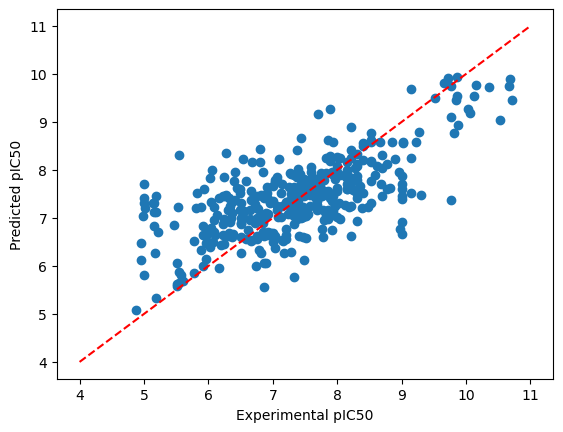

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel("Experimental pIC50")
plt.ylabel("Predicted pIC50")
plt.plot(range(4, 12), range(4, 12), "r--", label = "y=x")

## MSE error

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mse1 = mean_squared_error(y_test, y_pred)
mse1

0.7141153065111374

In [61]:
import math

In [62]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.8450534341159365

In [63]:
import numpy as np

In [64]:
np.corrcoef(y_test, y_pred)

array([[1.        , 0.68363821],
       [0.68363821, 1.        ]])

In [65]:
my_model.feature_importances_

array([0.16222521, 0.18946612, 0.08229156, 0.04684665, 0.18148325,
       0.06226732, 0.02627225, 0.19523095, 0.05391669])

In [66]:
fea_im_df = pd.DataFrame(my_model.feature_importances_, columns=['Importance'])

In [80]:
fea_im_df['Features'] = ["MW", "LogP","HBA","HBD","CSP3","Num Rot Bond","Num Rings","TPSA","Num Aromatic Rings"]

In [78]:
finalDf = fea_im_df[['Features', 'Importance']]

In [79]:
finalDf.sort_values(by=['Importance'], ascending=False, ignore_index=True, inplace=True)
finalDf

,Features,Importance
0,TPSA,0.195231
1,LogP,0.189466
2,CSP3,0.181483
3,MW,0.162225
4,HBA,0.082292
5,Num Rot Bond,0.062267
6,Num Aromatic Rings,0.053917
7,HBD,0.046847
8,Num Rings,0.026272


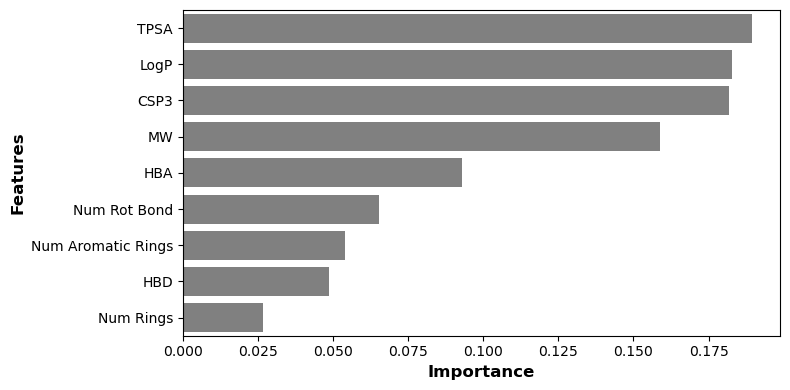

In [83]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(8,4))
sns.barplot(x=finalDf['Importance'], y=finalDf['Features'], data= finalDf, color='grey')
plt.xlabel('Importance', fontsize=12, weight='bold')
plt.ylabel('Features', fontsize=12, weight='bold')
plt.tight_layout()
#plt.savefig('Feature_importance_graph.jpg')

* 1: TPSA -> polar surface area.
* 2: logP 
* 3: fraction of SP3 carbon. 
* 4: Molecular weight. 

In [69]:
sample_predict = my_model.predict(X)
sample_predict

array([ 4.99702   ,  4.87745   ,  4.825     , ...,  8.97537917,
       10.46933667,  9.96703333])

In [70]:
colname = colname = ['sample_predict_pIC50']
sample_predict_df = pd.DataFrame(sample_predict, columns=colname)

In [71]:
sample_total = pd.concat([data, sample_predict_df], axis=1)
sample_total

,SMILES,pIC50,sample_predict_pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,4.997020
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,4.877450
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,4.825000
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,4.912400
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,5.270350
...,...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72,9.463893
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76,10.366800
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78,8.975379
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97,10.469337
